In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy


In [2]:
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv("C:\\Users\\Personal\\Downloads\\clean_HouseHoldTB.csv" )

In [4]:
df

,Unnamed: 0,FamilyCode,IndividualCode,IncidentTBDisease,FollowUpTime,Sex,Education,SputumSmearGrade,Diabetes,Incarceration,...,ContactAge,ContactSex,ContactChemotherapy,ContactWork,ContactHIV,IndexStrainGenotype,ContactDiabetes,Contact-IndexRoomshare,ContactPreviousTBHistory,MDR_or_SENS
0,0,1,1,0,545,1,2,0,0,0,...,3,1,0,2,0,4,0,0,0,2
1,1,1,2,0,118,1,2,0,0,0,...,2,1,1,3,0,4,0,0,0,2
2,2,1,3,0,118,1,2,0,0,0,...,3,0,1,3,0,4,0,0,0,2
3,3,1,4,0,118,1,2,0,0,0,...,3,1,0,3,0,4,0,0,0,2
4,4,1,5,0,545,1,2,0,0,0,...,8,0,0,1,0,4,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,4112,699,5,0,126,0,2,0,0,0,...,4,0,0,1,0,4,0,0,1,2
4113,4113,700,1,0,420,0,2,2,0,0,...,3,1,0,2,0,8,0,0,0,2
4114,4114,700,2,0,420,0,2,2,0,0,...,7,1,0,2,0,8,0,0,0,2
4115,4115,700,3,0,420,0,2,2,0,0,...,3,1,1,3,0,8,0,0,0,2


In [5]:
print(df.dtypes)

Unnamed: 0                  int64
FamilyCode                  int64
IndividualCode              int64
IncidentTBDisease           int64
FollowUpTime                int64
Sex                         int64
Education                   int64
SputumSmearGrade            int64
Diabetes                    int64
Incarceration               int64
Hospitalization             int64
AlcoholUse                  int64
TobaccoUse                  int64
SideEffectsofMedication     int64
HistoryofTBBefore           int64
HIVStatus                   int64
CoughDuration(days)         int64
Work                        int64
MDRSensitiveNumeric         int64
SocioEconomicTertile        int64
ContactAge                  int64
ContactSex                  int64
ContactChemotherapy         int64
ContactWork                 int64
ContactHIV                  int64
IndexStrainGenotype         int64
ContactDiabetes             int64
Contact-IndexRoomshare      int64
ContactPreviousTBHistory    int64
MDR_or_SENS   

In [6]:
newData = df.copy()

In [8]:
normalized_df=(newData-newData.min())/(newData.max()-newData.min())

# Hierarchical Clustering

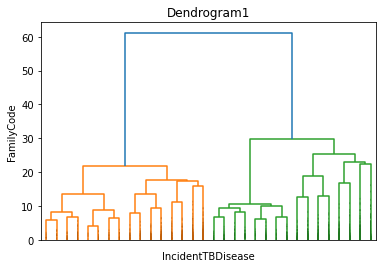

In [9]:


Z = hierarchy.linkage(normalized_df, 'ward', metric='euclidean')
hierarchy.dendrogram(Z, truncate_mode = 'level',p=4, 
                    
                     show_leaf_counts=False, 
                     leaf_rotation=90.,leaf_font_size=12.,
    show_contracted=True) # -> you will have 4 leaf at the bottom of the plot
plt.title('Dendrogram1') # title of the dendrogram
plt.xlabel('IncidentTBDisease') # label of the x-axis
plt.ylabel('FamilyCode')
plt.show()

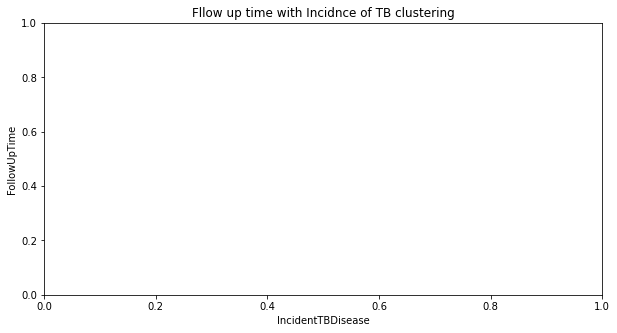

In [10]:
plt.figure(figsize=(10,5))

Z = hierarchy.linkage(normalized_df, 'ward', metric='euclidean')
plt.title('Fllow up time with Incidnce of TB clustering') # title of the dendrogram
plt.xlabel('IncidentTBDisease') # label of the x-axis
plt.ylabel('FollowUpTime') # label of the y-axis

plt.show()

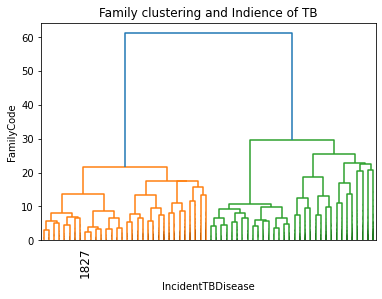

In [11]:
Z = hierarchy.linkage(normalized_df, 'ward')
hierarchy.dendrogram(Z, truncate_mode = 'level',p=5, 
                    
                     show_leaf_counts=False, 
                     leaf_rotation=90.,leaf_font_size=12.,
    show_contracted=True) # -> you will have 4 leaf at the bottom of the plot
plt.title('Family clustering and Indience of TB') # title of the dendrogram
plt.xlabel('IncidentTBDisease') # label of the x-axis
plt.ylabel('FamilyCode')
plt.show()

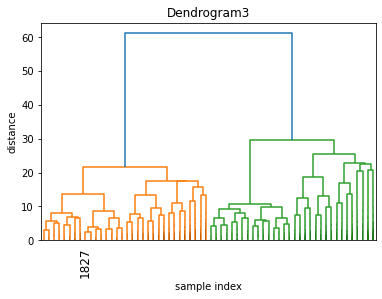

In [12]:

Z = hierarchy.linkage(normalized_df, 'ward')
hierarchy.dendrogram(Z, truncate_mode = 'level',p=5, 
                    
                     show_leaf_counts=False, 
                     leaf_rotation=90.,leaf_font_size=12.,
    show_contracted=True) # -> you will have 4 leaf at the bottom of the plot
plt.title('Dendrogram3') # title of the dendrogram
plt.xlabel('sample index') # label of the x-axis
plt.ylabel('distance')
plt.show()

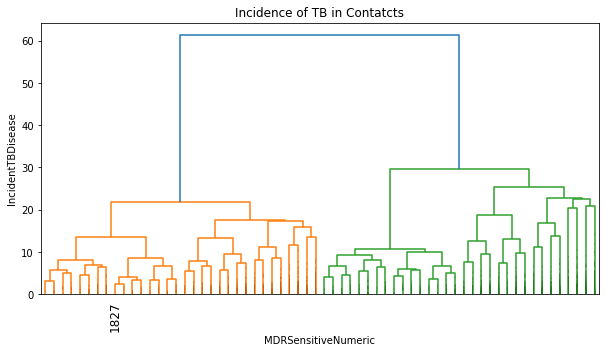

In [13]:
plt.figure(figsize=(10,5))
Z = hierarchy.linkage(normalized_df, 'ward', metric='euclidean')
hierarchy.dendrogram(Z, truncate_mode = 'level',p=5, 
                    
                     show_leaf_counts=False, 
                     leaf_rotation=90.,leaf_font_size=12.,
    show_contracted=True) # -> you will have 4 leaf at the bottom of the plot
plt.title('Incidence of TB in Contatcts') # title of the dendrogram
plt.ylabel('IncidentTBDisease') # label of the x-axis
plt.xlabel('MDRSensitiveNumeric')
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

Agg_hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(normalized_df) 

In [15]:
print(cluster_labels)

NameError: name 'cluster_labels' is not defined

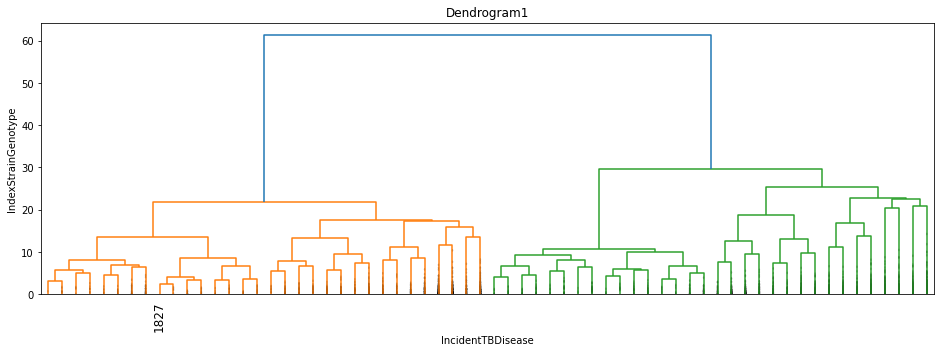

In [16]:
plt.figure(figsize=(16,5))
Z = hierarchy.linkage(normalized_df, 'ward', metric='euclidean')
hierarchy.dendrogram(Z, truncate_mode = 'level',p=5, 
                    
                     show_leaf_counts=False, 
                     leaf_rotation=90.,leaf_font_size=12.,
    show_contracted=True) # -> you will have 4 leaf at the bottom of the plot

plt.title('Dendrogram1') # title of the dendrogram

plt.ylabel('IndexStrainGenotype') # label of the x-axis
plt.xlabel('IncidentTBDisease')

plt.show()

## AgglomerativeCllustering with PCA n =3

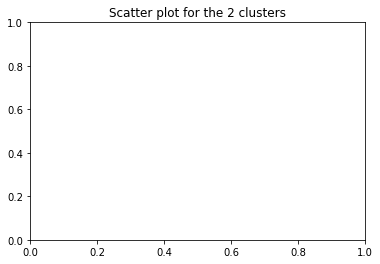

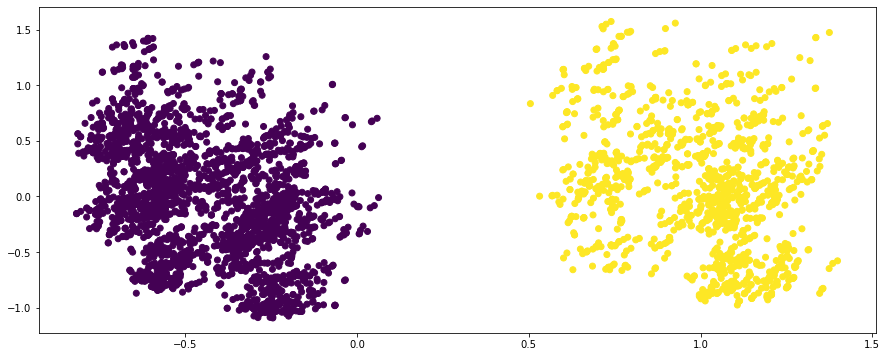

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Perform Agglomerative Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
cluster_labels = agglomerative_clustering.fit_predict(normalized_df)

# Apply PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components= 3)
pca_transformed_data = pca.fit_transform(normalized_df)


# Visualize the clusters in a scatter plot
plt.title('Scatter plot for the 2 clusters')
plt.figure(figsize=(15,6))
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=cluster_labels)

plt.show()


In [18]:
pca_transformed_data

array([[ 1.31559917,  0.29068139, -0.07760904],
       [ 1.22793319,  0.26090485,  0.05781643],
       [ 1.25825088,  0.49055378, -0.39798592],
       ...,
       [ 1.27751154, -0.6315149 ,  0.41014981],
       [ 1.2182697 , -0.67072443,  0.57333938],
       [ 1.23938118, -0.48552167,  0.22269959]])

In [19]:
scores_pca = pca_transformed_data

# Use kmeans with PCA scores

In [21]:
from sklearn.cluster import KMeans
##option1 
wcss=[]
for i in range(1,21):
        kmeans_pca = KMeans(n_clusters = i, init ='k-means++', random_state=42)
        kmeans_pca.fit(scores_pca)
        wcss.append(kmeans_pca.inertia_)

In [22]:
kmeans_pca.labels_

array([2, 2, 2, ..., 0, 0, 0])

In [23]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

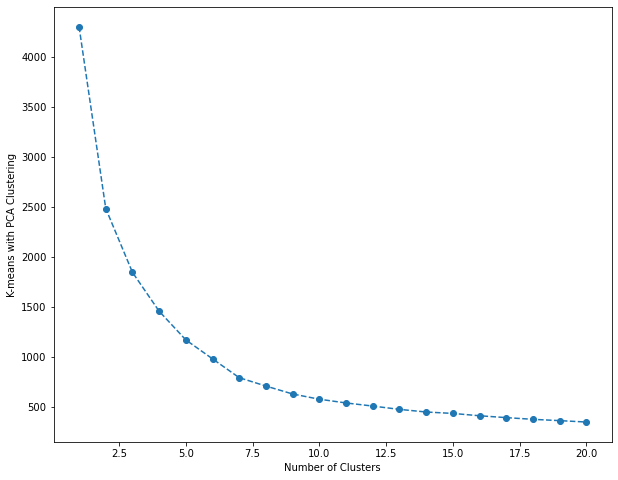

In [24]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('K-means with PCA Clustering')
plt.show()

In [25]:
normalized_df

,Unnamed: 0,FamilyCode,IndividualCode,IncidentTBDisease,FollowUpTime,Sex,Education,SputumSmearGrade,Diabetes,Incarceration,...,ContactAge,ContactSex,ContactChemotherapy,ContactWork,ContactHIV,IndexStrainGenotype,ContactDiabetes,Contact-IndexRoomshare,ContactPreviousTBHistory,MDR_or_SENS
0,0.000000,0.000000,0.00,0.0,0.566077,1.0,1.0,0.000000,0.0,0.0,...,0.250,1.0,0.0,0.5,0.0,0.333333,0.0,0.0,0.0,1.0
1,0.000243,0.000000,0.05,0.0,0.121748,1.0,1.0,0.000000,0.0,0.0,...,0.125,1.0,1.0,1.0,0.0,0.333333,0.0,0.0,0.0,1.0
2,0.000486,0.000000,0.10,0.0,0.121748,1.0,1.0,0.000000,0.0,0.0,...,0.250,0.0,1.0,1.0,0.0,0.333333,0.0,0.0,0.0,1.0
3,0.000729,0.000000,0.15,0.0,0.121748,1.0,1.0,0.000000,0.0,0.0,...,0.250,1.0,0.0,1.0,0.0,0.333333,0.0,0.0,0.0,1.0
4,0.000972,0.000000,0.20,0.0,0.566077,1.0,1.0,0.000000,0.0,0.0,...,0.875,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,0.999028,0.998569,0.20,0.0,0.130073,0.0,1.0,0.000000,0.0,0.0,...,0.375,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,1.0
4113,0.999271,1.000000,0.00,0.0,0.436004,0.0,1.0,0.666667,0.0,0.0,...,0.250,1.0,0.0,0.5,0.0,0.777778,0.0,0.0,0.0,1.0
4114,0.999514,1.000000,0.05,0.0,0.436004,0.0,1.0,0.666667,0.0,0.0,...,0.750,1.0,0.0,0.5,0.0,0.777778,0.0,0.0,0.0,1.0
4115,0.999757,1.000000,0.10,0.0,0.436004,0.0,1.0,0.666667,0.0,0.0,...,0.250,1.0,1.0,1.0,0.0,0.777778,0.0,0.0,0.0,1.0


In [26]:
#analysis of Kmeans with PCA

df_kmeans_pca = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)



In [28]:
df_kmeans_pca

,Unnamed: 0,FamilyCode,IndividualCode,IncidentTBDisease,FollowUpTime,Sex,Education,SputumSmearGrade,Diabetes,Incarceration,...,ContactWork,ContactHIV,IndexStrainGenotype,ContactDiabetes,Contact-IndexRoomshare,ContactPreviousTBHistory,MDR_or_SENS,0,1,2
0,0,1,1,0,545,1,2,0,0,0,...,2,0,4,0,0,0,2,1.315599,0.290681,-0.077609
1,1,1,2,0,118,1,2,0,0,0,...,3,0,4,0,0,0,2,1.227933,0.260905,0.057816
2,2,1,3,0,118,1,2,0,0,0,...,3,0,4,0,0,0,2,1.258251,0.490554,-0.397986
3,3,1,4,0,118,1,2,0,0,0,...,3,0,4,0,0,0,2,1.272520,0.275571,-0.017085
4,4,1,5,0,545,1,2,0,0,0,...,1,0,4,0,0,0,2,1.361437,0.550285,-0.637110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,4112,699,5,0,126,0,2,0,0,0,...,1,0,4,0,0,1,2,1.251960,-0.489854,-0.284555
4113,4113,700,1,0,420,0,2,2,0,0,...,2,0,8,0,0,0,2,1.274678,-0.639556,0.448591
4114,4114,700,2,0,420,0,2,2,0,0,...,2,0,8,0,0,0,2,1.277512,-0.631515,0.410150
4115,4115,700,3,0,420,0,2,2,0,0,...,3,0,8,0,0,0,2,1.218270,-0.670724,0.573339


In [29]:
df_kmeans_pca.columns.values[-3:]= ['Component 1','Component 2', 'Component3']

In [30]:
df_kmeans_pca

,Unnamed: 0,FamilyCode,IndividualCode,IncidentTBDisease,FollowUpTime,Sex,Education,SputumSmearGrade,Diabetes,Incarceration,...,ContactWork,ContactHIV,IndexStrainGenotype,ContactDiabetes,Contact-IndexRoomshare,ContactPreviousTBHistory,MDR_or_SENS,Component 1,Component 2,Component3
0,0,1,1,0,545,1,2,0,0,0,...,2,0,4,0,0,0,2,1.315599,0.290681,-0.077609
1,1,1,2,0,118,1,2,0,0,0,...,3,0,4,0,0,0,2,1.227933,0.260905,0.057816
2,2,1,3,0,118,1,2,0,0,0,...,3,0,4,0,0,0,2,1.258251,0.490554,-0.397986
3,3,1,4,0,118,1,2,0,0,0,...,3,0,4,0,0,0,2,1.272520,0.275571,-0.017085
4,4,1,5,0,545,1,2,0,0,0,...,1,0,4,0,0,0,2,1.361437,0.550285,-0.637110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,4112,699,5,0,126,0,2,0,0,0,...,1,0,4,0,0,1,2,1.251960,-0.489854,-0.284555
4113,4113,700,1,0,420,0,2,2,0,0,...,2,0,8,0,0,0,2,1.274678,-0.639556,0.448591
4114,4114,700,2,0,420,0,2,2,0,0,...,2,0,8,0,0,0,2,1.277512,-0.631515,0.410150
4115,4115,700,3,0,420,0,2,2,0,0,...,3,0,8,0,0,0,2,1.218270,-0.670724,0.573339


In [31]:
df_kmeans_pca['Segment K-means PCA'] = kmeans_pca.labels_

In [32]:
df_kmeans_pca

,Unnamed: 0,FamilyCode,IndividualCode,IncidentTBDisease,FollowUpTime,Sex,Education,SputumSmearGrade,Diabetes,Incarceration,...,ContactHIV,IndexStrainGenotype,ContactDiabetes,Contact-IndexRoomshare,ContactPreviousTBHistory,MDR_or_SENS,Component 1,Component 2,Component3,Segment K-means PCA
0,0,1,1,0,545,1,2,0,0,0,...,0,4,0,0,0,2,1.315599,0.290681,-0.077609,0
1,1,1,2,0,118,1,2,0,0,0,...,0,4,0,0,0,2,1.227933,0.260905,0.057816,0
2,2,1,3,0,118,1,2,0,0,0,...,0,4,0,0,0,2,1.258251,0.490554,-0.397986,0
3,3,1,4,0,118,1,2,0,0,0,...,0,4,0,0,0,2,1.272520,0.275571,-0.017085,0
4,4,1,5,0,545,1,2,0,0,0,...,0,4,0,0,0,2,1.361437,0.550285,-0.637110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,4112,699,5,0,126,0,2,0,0,0,...,0,4,0,0,1,2,1.251960,-0.489854,-0.284555,0
4113,4113,700,1,0,420,0,2,2,0,0,...,0,8,0,0,0,2,1.274678,-0.639556,0.448591,0
4114,4114,700,2,0,420,0,2,2,0,0,...,0,8,0,0,0,2,1.277512,-0.631515,0.410150,0
4115,4115,700,3,0,420,0,2,2,0,0,...,0,8,0,0,0,2,1.218270,-0.670724,0.573339,0


In [33]:
df_kmeans_pca['Segment'] = df_kmeans_pca['Segment K-means PCA'].map({0:'first',1:'second',2:'third',3:'fourth'})

In [34]:
df_kmeans_pca

,Unnamed: 0,FamilyCode,IndividualCode,IncidentTBDisease,FollowUpTime,Sex,Education,SputumSmearGrade,Diabetes,Incarceration,...,IndexStrainGenotype,ContactDiabetes,Contact-IndexRoomshare,ContactPreviousTBHistory,MDR_or_SENS,Component 1,Component 2,Component3,Segment K-means PCA,Segment
0,0,1,1,0,545,1,2,0,0,0,...,4,0,0,0,2,1.315599,0.290681,-0.077609,0,first
1,1,1,2,0,118,1,2,0,0,0,...,4,0,0,0,2,1.227933,0.260905,0.057816,0,first
2,2,1,3,0,118,1,2,0,0,0,...,4,0,0,0,2,1.258251,0.490554,-0.397986,0,first
3,3,1,4,0,118,1,2,0,0,0,...,4,0,0,0,2,1.272520,0.275571,-0.017085,0,first
4,4,1,5,0,545,1,2,0,0,0,...,4,0,0,0,2,1.361437,0.550285,-0.637110,0,first
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,4112,699,5,0,126,0,2,0,0,0,...,4,0,0,1,2,1.251960,-0.489854,-0.284555,0,first
4113,4113,700,1,0,420,0,2,2,0,0,...,8,0,0,0,2,1.274678,-0.639556,0.448591,0,first
4114,4114,700,2,0,420,0,2,2,0,0,...,8,0,0,0,2,1.277512,-0.631515,0.410150,0,first
4115,4115,700,3,0,420,0,2,2,0,0,...,8,0,0,0,2,1.218270,-0.670724,0.573339,0,first


# Plotting Clusters with Kmeans and PCA score

C:\Users\Personal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


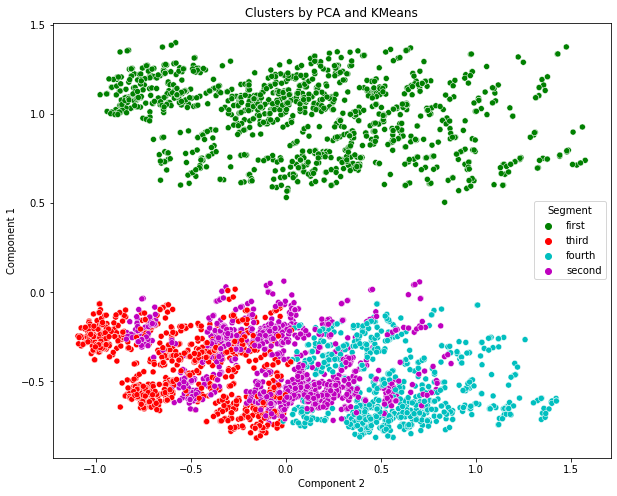

In [35]:
x_axis = df_kmeans_pca['Component 2']
y_axis = df_kmeans_pca['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = df_kmeans_pca['Segment'], palette = ['g','r','c','m'])
plt.title('Clusters by PCA and KMeans')
plt.show()

## KMeans without PCA

In [36]:
##option2
from sklearn import preprocessing
kmData = df.copy()
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(normalized_df)


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.42954325e-04, 0.00000000e+00, 5.00000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.85908649e-04, 0.00000000e+00, 1.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99514091e-01, 1.00000000e+00, 5.00000000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.99757046e-01, 1.00000000e+00, 1.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.50000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

Text(0, 0.5, 'WCSS')

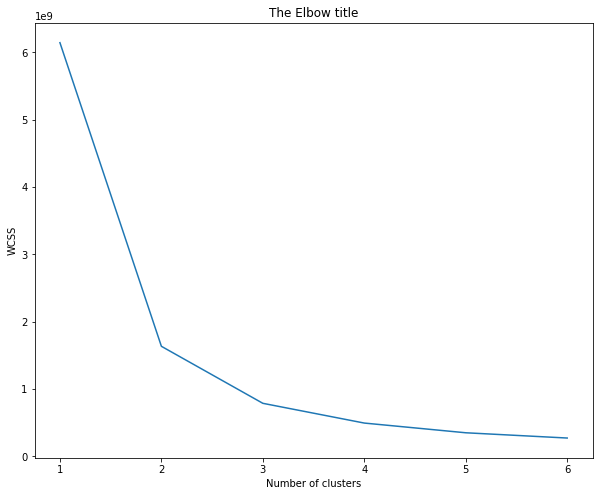

In [329]:
from sklearn.cluster import KMeans
#checking for number of clusters to select using elbow method
wcss=[]
for i in range(1,7):
        kmeans = KMeans(i)
        kmeans.fit(kmData)
        wcss_iter = kmeans.inertia_
        wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.figure(figsize=(10,8))
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## still shows only 2 clusters can be gotten

## choosing 2 clusters for the model with a kink

In [319]:
#cheking correct predictions with SputumSmearGrade at n clusters
#x = kmData.drop(['IncidentTBDisease'], axis =1)
#y = kmData['FollowUpTime']
kmeans = KMeans(n_clusters=2, init = 'k-means++', random_state=42)

kmeans.fit(kmData)

labels = kmeans.labels_
 


# check how many of the samples were correctly labeled

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))


Result: 2079 out of 4117 samples were correctly labeled.
Accuracy score: 0.50


### unsupervised learning only scoring 50% of correctly labeled features, underperforming kmeans

## plotting features to investigate relationships

Text(0.5, 1.0, 'Checking distribution of sex with follow up time')

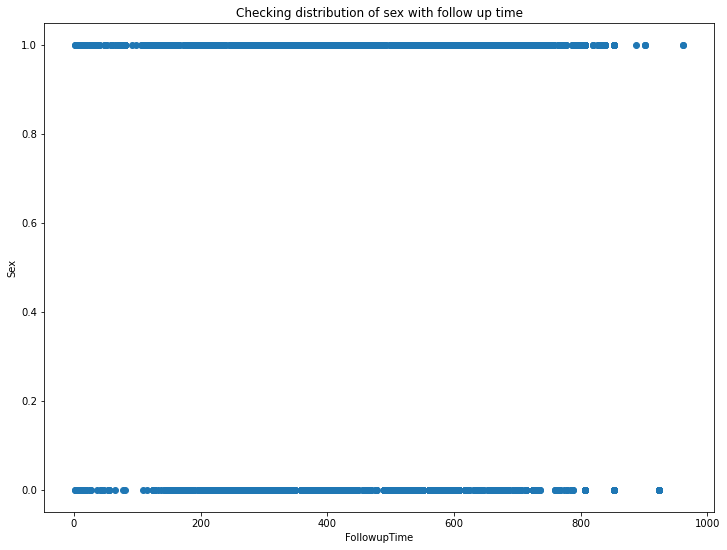

In [281]:
plt.figure(figsize = (12,9))
plt.scatter(df.iloc[:, 4], df.iloc[:,5])
plt.xlabel('FollowupTime')
plt.ylabel('Sex')

plt.title('Checking distribution of sex with follow up time')

<AxesSubplot:xlabel='FollowUpTime', ylabel='IncidentTBDisease'>

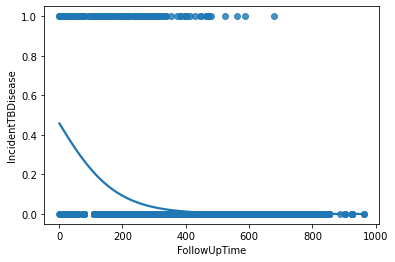

In [345]:
import seaborn as sns
x = df['FollowUpTime']
y = df['IncidentTBDisease']
sns.regplot(x=x, y=y, data=normalized_df, logistic=True, ci=None)


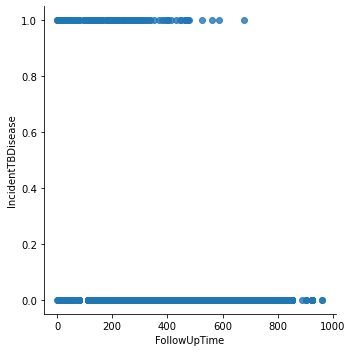

In [414]:
sns.lmplot(x='FollowUpTime', y= 'IncidentTBDisease', data = newData, fit_reg=False)

<AxesSubplot:xlabel='FollowUpTime', ylabel='CoughDuration(days)'>

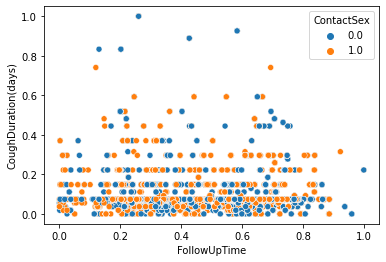

In [251]:
sns.scatterplot( x='FollowUpTime', y= 'CoughDuration(days)', data=normalized_df, hue ='ContactSex')

<AxesSubplot:xlabel='FollowUpTime', ylabel='CoughDuration(days)'>

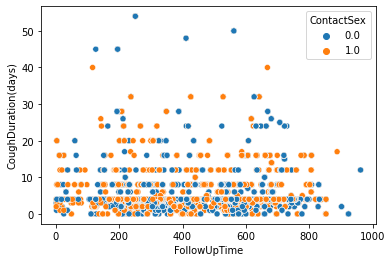

In [252]:
sns.scatterplot( x='FollowUpTime', y= 'CoughDuration(days)', data=kmData, hue ='ContactSex')

<AxesSubplot:xlabel='FollowUpTime', ylabel='IncidentTBDisease'>

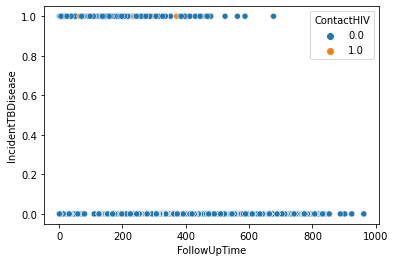

In [411]:
sns.scatterplot( x='FollowUpTime', y= 'IncidentTBDisease', data=kmData, hue ='ContactHIV')

# logistic regression supervised

In [256]:
y= df['IncidentTBDisease']
x = df.drop(['IncidentTBDisease'], axis =1)

In [258]:
from sklearn.linear_model import LogisticRegression

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
y= df['IncidentTBDisease']
X = df.drop(['IncidentTBDisease'], axis =1)
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [266]:
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [267]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [271]:
prediction =logreg.predict(X_test)

In [272]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



## Prediction of 100%, very questionable but fits since the data is categorical. Overfitting detected due to lack of feature selection 

#### test with confusion matrix

In [424]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, prediction)
cnf_matrix

array([[15,  0],
       [ 0, 10]], dtype=int64)

### Plotting the confusion matrix

Text(0.5, 257.44, 'Predicted label')

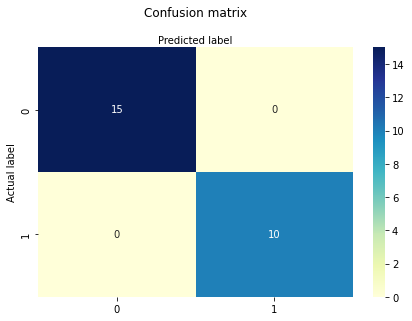

In [412]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC of the overfitted data

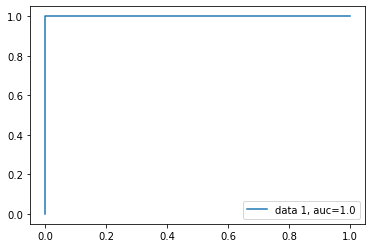

In [409]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [400]:
df = pd.get_dummies(df, columns=["IncidentTBDisease","FollowUpTime","Sex","Education","SputumSmearGrade","Diabetes",
 "Incarceration","Hospitalization","AlcoholUse","TobaccoUse","SideEffectsofMedication",	"HistoryofTBBefore",
            "HIVStatus","CoughDuration(days)","Work","MDRSensitiveNumeric","SocioEconomicTertile",
])


# Supervised learning starts here

In [9]:
normalized_df=(newData-newData.min())/(newData.max()-newData.min())